In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
upfront_pricing = pd .read_csv('Problem Statement - Blinkit - data.csv')

In [3]:
upfront_pricing.info()
upfront_pricing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id_new           4943 non-null   int64  
 1   order_try_id_new       4943 non-null   int64  
 2   calc_created           4943 non-null   object 
 3   metered_price          4923 non-null   float64
 4   upfront_price          3409 non-null   float64
 5   distance               4943 non-null   int64  
 6   duration               4943 non-null   int64  
 7   gps_confidence         4943 non-null   int64  
 8   entered_by             4943 non-null   object 
 9   b_state                4943 non-null   object 
 10  dest_change_number     4943 non-null   int64  
 11  prediction_price_type  4923 non-null   object 
 12  predicted_distance     4923 non-null   float64
 13  predicted_duration     4923 non-null   float64
 14  change_reason_pricing  298 non-null    object 
 15  tick

,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,predicted_distance,predicted_duration,ticket_id_new,driver_device_uid_new,us_indicator,overpaid_ride_ticket,fraud_score
count,4943.000000,4943.000000,4923.000000,3409.000000,4943.000000,4943.000000,4943.000000,4943.000000,4923.000000,4923.000000,4943.000000,4943.000000,4943.000000,4943.000000,2184.000000
mean,2061.074449,2061.074044,7998.471296,4160.095747,9769.223144,1566.230629,0.800728,1.119361,8822.636807,1106.737355,2471.000000,1093.311349,0.560388,0.068177,-674.046703
std,1199.298429,1199.299081,15815.850352,17015.711912,10912.426401,1650.329858,0.399493,0.499611,10548.801733,806.098535,1427.065521,626.408069,0.496390,0.252075,1119.189890
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14225.000000
25%,1020.500000,1020.500000,5.380000,4.200000,3785.500000,604.000000,1.000000,1.000000,4130.500000,597.500000,1235.500000,561.500000,0.000000,0.000000,-826.500000
50%,2065.000000,2065.000000,13.350000,6.600000,7140.000000,1054.000000,1.000000,1.000000,6918.000000,939.000000,2471.000000,1088.000000,1.000000,0.000000,-278.500000
75%,3090.500000,3090.500000,10991.670000,4000.000000,11953.000000,1929.500000,1.000000,1.000000,10674.000000,1427.000000,3706.500000,1643.000000,1.000000,0.000000,-64.750000
max,4165.000000,4165.000000,194483.520000,595000.000000,233190.000000,22402.000000,1.000000,12.000000,353538.000000,20992.000000,4942.000000,2158.000000,1.000000,1.000000,49.000000


In [4]:
upfront_pricing.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,ticket_id_new,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,us_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,...,1376,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,...,2035,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,2222,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,...,1788,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,2710,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


### Checking Correlation between upfront_price and other features.

In [6]:
corr_data = upfront_pricing[['upfront_price', 'predicted_duration', 'predicted_distance', 'metered_price', 
                              'gps_confidence', 'dest_change_number', 'fraud_score','us_indicator','overpaid_ride_ticket']].corr()

print("Correlation of features with 'upfront_price':")
print(corr_data['upfront_price'].sort_values(ascending=False))

Correlation of features with 'upfront_price':
upfront_price           1.000000
predicted_duration      0.746837
predicted_distance      0.715542
metered_price           0.420772
overpaid_ride_ticket    0.123028
dest_change_number      0.051178
fraud_score            -0.075351
gps_confidence         -0.206987
us_indicator           -0.413250
Name: upfront_price, dtype: float64


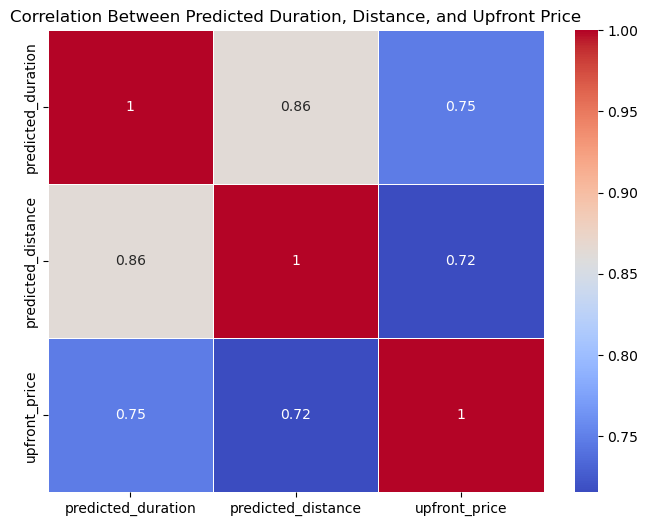

In [7]:
corr_col = ['predicted_duration', 'predicted_distance', 'upfront_price']

# Compute the correlation matrix
corr_values = upfront_pricing[corr_col].corr()

# Create a heatmap for the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_values, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Predicted Duration, Distance, and Upfront Price')
plt.show()

In [8]:
print("\nCorrelation of features with 'fraud_score':")
print(corr_data['fraud_score'].sort_values(ascending=False))


Correlation of features with 'fraud_score':
fraud_score             1.000000
predicted_distance      0.064431
predicted_duration      0.059157
dest_change_number      0.027714
us_indicator            0.006967
metered_price          -0.014472
gps_confidence         -0.026592
overpaid_ride_ticket   -0.028465
upfront_price          -0.075351
Name: fraud_score, dtype: float64


##### Clearly Upfront Price is correlated to predicted_duration, predicted_distance, metered_price, us_indicator.

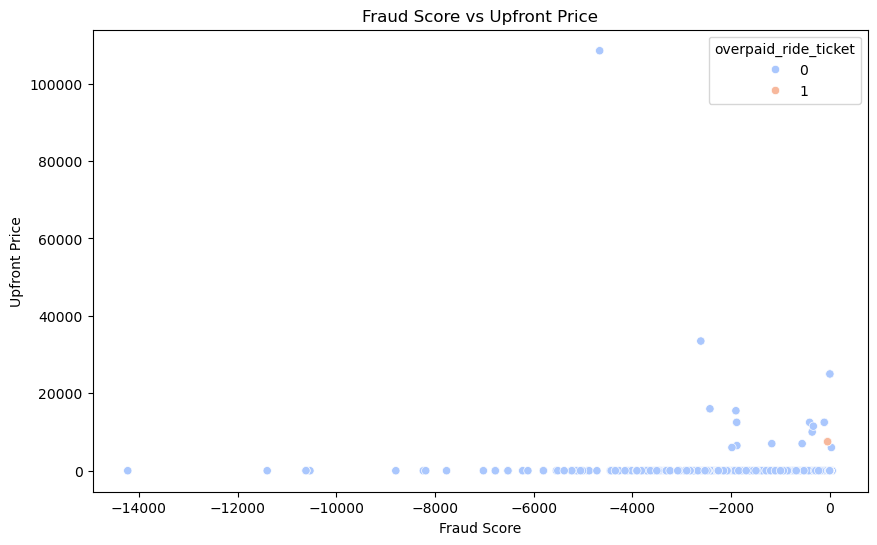

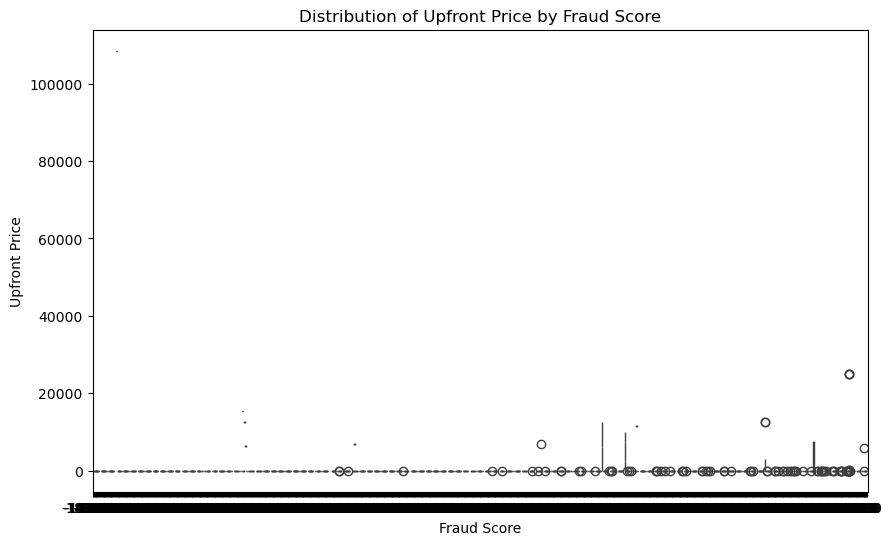

In [10]:
# Scatter plot: fraud_score vs upfront_price to check if fraud score affects anything or not.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=upfront_pricing, x='fraud_score', y='upfront_price', hue='overpaid_ride_ticket', palette='coolwarm')
plt.title('Fraud Score vs Upfront Price')
plt.xlabel('Fraud Score')
plt.ylabel('Upfront Price')
plt.show()

# Boxplot: fraud_score vs upfront_price
plt.figure(figsize=(10, 6))
sns.boxplot(data=upfront_pricing, x='fraud_score', y='upfront_price')
plt.title('Distribution of Upfront Price by Fraud Score')
plt.xlabel('Fraud Score')
plt.ylabel('Upfront Price')
plt.show()

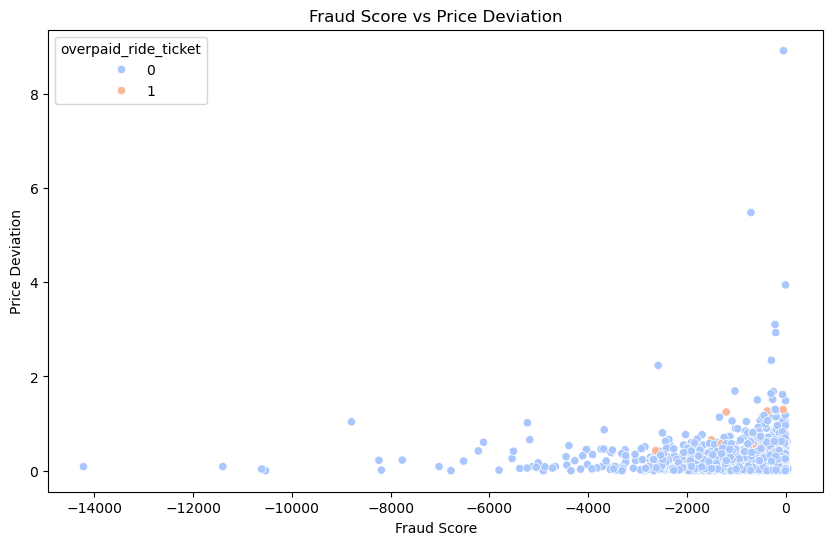

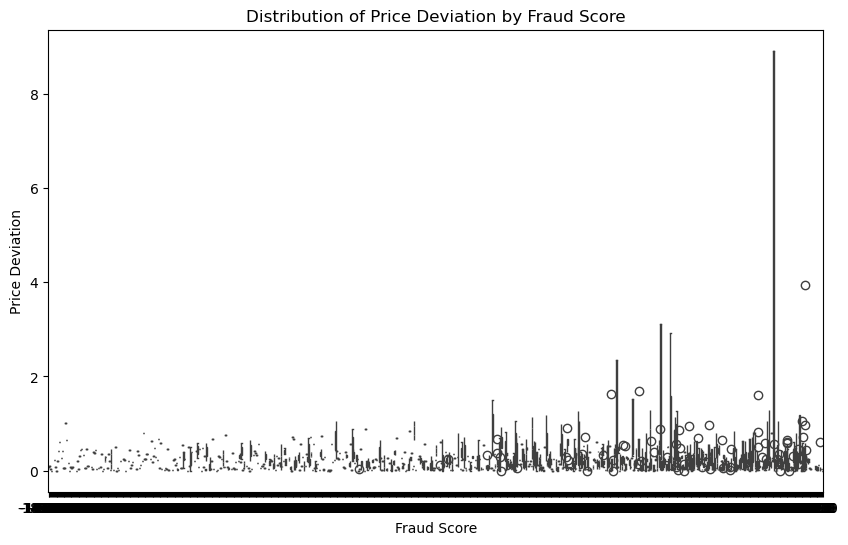

In [11]:
# Calculate price deviation as percentage
upfront_pricing['price_deviation'] = abs(upfront_pricing['metered_price'] - upfront_pricing['upfront_price']) / upfront_pricing['upfront_price']

# Scatter plot: fraud_score vs price_deviation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=upfront_pricing, x='fraud_score', y='price_deviation', hue='overpaid_ride_ticket', palette='coolwarm')
plt.title('Fraud Score vs Price Deviation')
plt.xlabel('Fraud Score')
plt.ylabel('Price Deviation')
plt.show()

# Boxplot: fraud_score vs price_deviation
plt.figure(figsize=(10, 6))
sns.boxplot(data=upfront_pricing, x='fraud_score', y='price_deviation')
plt.title('Distribution of Price Deviation by Fraud Score')
plt.xlabel('Fraud Score')
plt.ylabel('Price Deviation')
plt.show()

#### from the above plots we can see that fraud score does not really affect the upfront_price.

##### Imputing the missing values in the dataset for good analysis.

In [14]:
# 97th percentile of 'upfront_price'
percentile_97 = upfront_pricing['upfront_price'].quantile(0.97)
print(f"97th Percentile of upfront_price: {percentile_97}")

97th Percentile of upfront_price: 23000.0


In [15]:
# For good imputations capping the value at 97th percentile($23000)
upfront_pricing['upfront_price_cap'] = upfront_pricing['upfront_price'].apply(lambda x: min(x, percentile_97) if pd.notnull(x) else x)

#### Linear Regression for predicting upfront_price missing Values

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#columns with high correlation with upfront_price to get good estimate
features = ['predicted_duration', 'predicted_distance', 'metered_price','us_indicator']


training_data = upfront_pricing.dropna(subset=['upfront_price_cap', 'predicted_duration', 'predicted_distance', 'metered_price','us_indicator'])
x_train = training_data[features]
y_train = training_data['upfront_price_cap']

# Train the regression model
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

LinearRegression()

In [18]:
# Check model accuracy 
y_pred_train = reg_model.predict(x_train)

# Calculate accuracy metrics 
m_absolute_train = mean_absolute_error(y_train, y_pred_train)
m_squared_train = mean_squared_error(y_train, y_pred_train)
r_squared_train = r2_score(y_train, y_pred_train)

print(f"Mean Absolute Error (MAE): {m_absolute_train}")
print(f"Mean Squared Error (MSE): {m_squared_train}")
print(f"R-squared (R²): {r_squared_train}")

Mean Absolute Error (MAE): 1320.7822161411016
Mean Squared Error (MSE): 5035354.744017957
R-squared (R²): 0.8703436407549188


In [19]:
# Rows where upfront_price is missing but predictors are available
upfront_price_missing = upfront_pricing[upfront_pricing['upfront_price'].isnull() & 
                               upfront_pricing['predicted_duration'].notnull() & 
                               upfront_pricing['predicted_distance'].notnull() & 
                               upfront_pricing['metered_price'].notnull() & upfront_pricing['us_indicator'].notnull()]

# Predict missing upfront prices
if not upfront_price_missing.empty:
    x_missing = upfront_price_missing[features]
    predicted_upfront_prices = reg_model.predict(x_missing)

    # Impute the missing upfront_price values
    upfront_pricing.loc[upfront_price_missing.index, 'upfront_price'] = predicted_upfront_prices
    print(f"Imputed missing upfront_price values for {len(predicted_upfront_prices)} rows.")
else:
    print("No rows found with missing upfront_price and available predictors.")

Imputed missing upfront_price values for 1514 rows.


In [20]:
# Remove rows with missing values for upfront_price
upfront_pricing_cleaned = upfront_pricing.dropna(subset=['upfront_price'])

print("Data cleaned and missing upfront_price values imputed.")

Data cleaned and missing upfront_price values imputed.


#### checking if the data is filled or not.

In [22]:
upfront_pricing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4923 entries, 0 to 4942
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id_new           4923 non-null   int64  
 1   order_try_id_new       4923 non-null   int64  
 2   calc_created           4923 non-null   object 
 3   metered_price          4923 non-null   float64
 4   upfront_price          4923 non-null   float64
 5   distance               4923 non-null   int64  
 6   duration               4923 non-null   int64  
 7   gps_confidence         4923 non-null   int64  
 8   entered_by             4923 non-null   object 
 9   b_state                4923 non-null   object 
 10  dest_change_number     4923 non-null   int64  
 11  prediction_price_type  4923 non-null   object 
 12  predicted_distance     4923 non-null   float64
 13  predicted_duration     4923 non-null   float64
 14  change_reason_pricing  298 non-null    object 
 15  ticket_id

In [23]:
upfront_pricing_cleaned.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,us_indicator,overpaid_ride_ticket,fraud_score,price_deviation,upfront_price_cap
0,22,22,2020-02-02 3:37:31,4.04,10.000000,2839,700,1,client,finished,...,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0,0.596000,10.0
1,618,618,2020-02-08 2:26:19,6.09,3.600000,5698,493,1,client,finished,...,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN,0.691667,3.6
2,657,657,2020-02-08 11:50:35,4.32,3.500000,4426,695,1,client,finished,...,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0,0.234286,3.5
3,313,313,2020-02-05 6:34:54,72871.72,17317.299038,49748,1400,0,client,finished,...,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN,NaN,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.000000,10273,5067,1,client,finished,...,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN,0.027308,19500.0


In [24]:
upfront_pricing_cleaned.describe()

,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,predicted_distance,predicted_duration,ticket_id_new,driver_device_uid_new,us_indicator,overpaid_ride_ticket,fraud_score,price_deviation,upfront_price_cap
count,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,2182.000000,3409.000000,3409.000000
mean,2062.042454,2062.042048,7998.471296,6032.614753,9777.768637,1567.445663,0.800325,1.118424,8822.636807,1106.737355,2470.618728,1093.210644,0.558602,0.068454,-674.048579,0.319106,3207.910355
std,1199.175514,1199.176169,15815.850352,14709.560084,10926.392521,1651.995321,0.399797,0.498262,10548.801733,806.098535,1427.371647,626.779925,0.496604,0.252549,1119.556480,0.629862,6232.780499
min,0.000000,0.000000,2.000000,-1602.443748,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14225.000000,0.000000,2.000000
25%,1021.500000,1021.500000,5.380000,4.800000,3793.000000,604.500000,1.000000,1.000000,4130.500000,597.500000,1234.500000,561.000000,0.000000,0.000000,-825.500000,0.043636,4.200000
50%,2068.000000,2068.000000,13.350000,12.600000,7145.000000,1054.000000,1.000000,1.000000,6918.000000,939.000000,2471.000000,1088.000000,1.000000,0.000000,-278.500000,0.165957,6.600000
75%,3091.500000,3091.500000,10991.670000,10816.617490,11956.000000,1929.500000,1.000000,1.000000,10674.000000,1427.000000,3707.500000,1643.500000,1.000000,0.000000,-64.250000,0.348718,4000.000000
max,4165.000000,4165.000000,194483.520000,595000.000000,233190.000000,22402.000000,1.000000,12.000000,353538.000000,20992.000000,4942.000000,2158.000000,1.000000,1.000000,49.000000,11.547324,23000.000000


In [25]:
# Check for negative values in 'upfront_price'
negative_upfront_prices = upfront_pricing_cleaned[upfront_pricing_cleaned['upfront_price'] < 0]

num_negative_values = len(negative_upfront_prices)

print(f"Number of negative values in upfront_price: {num_negative_values}")

if num_negative_values > 0:
    print(negative_upfront_prices[['upfront_price']])

Number of negative values in upfront_price: 123
      upfront_price
11       -48.022965
18      -366.872734
19     -1046.165000
49       -28.479729
245     -722.098113
...             ...
4675    -505.894420
4698    -175.385729
4813     -28.320162
4842    -821.202693
4896   -1602.147768

[123 rows x 1 columns]


In [26]:
upfront_final_cleaned = upfront_pricing_cleaned[upfront_pricing_cleaned['upfront_price'] >= 0]

print(f"Number of rows after removing negative upfront_price values: {upfront_final_cleaned.shape[0]}")

Number of rows after removing negative upfront_price values: 4800


#### Drop the unnecessary Columns

In [28]:
upfront_final=upfront_final_cleaned.drop(['price_deviation','upfront_price_cap','change_reason_pricing'], axis=1)
upfront_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4942
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id_new           4800 non-null   int64  
 1   order_try_id_new       4800 non-null   int64  
 2   calc_created           4800 non-null   object 
 3   metered_price          4800 non-null   float64
 4   upfront_price          4800 non-null   float64
 5   distance               4800 non-null   int64  
 6   duration               4800 non-null   int64  
 7   gps_confidence         4800 non-null   int64  
 8   entered_by             4800 non-null   object 
 9   b_state                4800 non-null   object 
 10  dest_change_number     4800 non-null   int64  
 11  prediction_price_type  4800 non-null   object 
 12  predicted_distance     4800 non-null   float64
 13  predicted_duration     4800 non-null   float64
 14  ticket_id_new          4800 non-null   int64  
 15  rider_app

#### 20% Limit for variations

In [30]:
upfront_final['price_deviation'] = abs(upfront_final['metered_price'] - upfront_final['upfront_price']) / upfront_final['upfront_price']

# Giving boolean values where deviation is more than 20%
upfront_final['large_deviation'] = upfront_final['price_deviation'] > 0.20

upfront_final[['upfront_price', 'metered_price', 'price_deviation', 'large_deviation']].head()

,upfront_price,metered_price,price_deviation,large_deviation
0,10.000000,4.04,0.596000,True
1,3.600000,6.09,0.691667,True
2,3.500000,4.32,0.234286,True
3,17317.299038,72871.72,3.208030,True
4,19500.000000,20032.50,0.027308,False


#### Checking distribution of the price_deviation data.

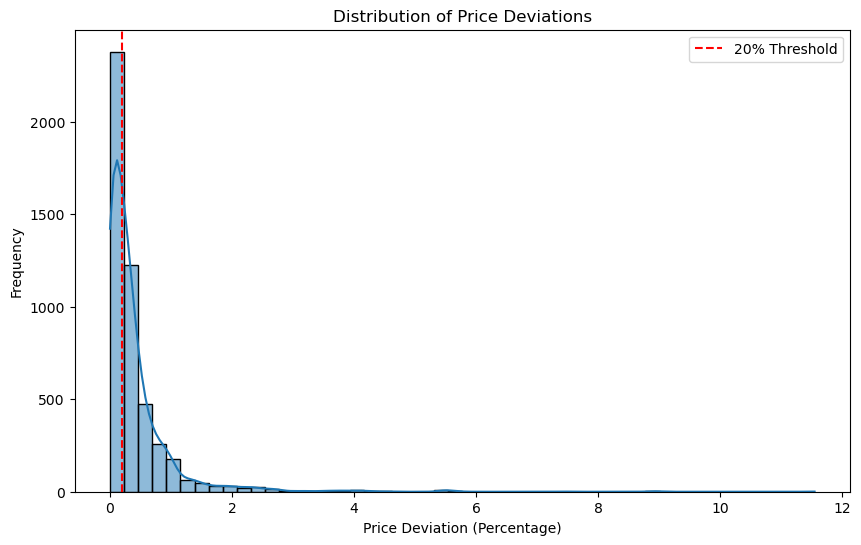

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(upfront_final['price_deviation'], bins=50, kde=True)
plt.axvline(0.20, color='r', linestyle='--', label='20% Threshold')
plt.title('Distribution of Price Deviations')
plt.xlabel('Price Deviation (Percentage)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

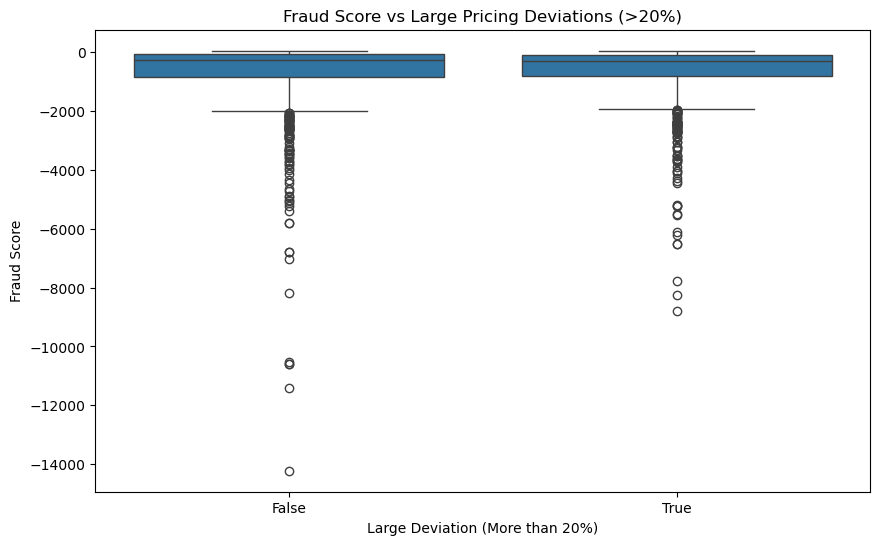

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=upfront_final, x='large_deviation', y='fraud_score')
plt.title('Fraud Score vs Large Pricing Deviations (>20%)')
plt.xlabel('Large Deviation (More than 20%)')
plt.ylabel('Fraud Score')
plt.show()

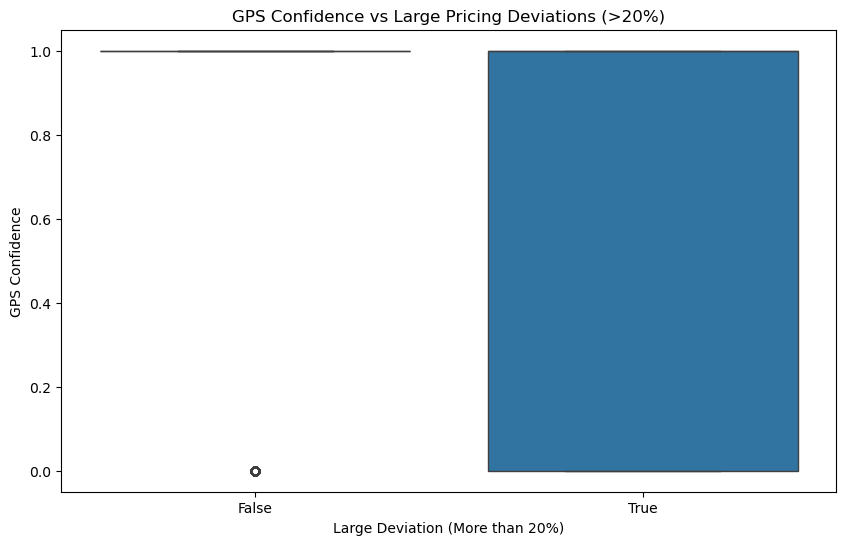

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=upfront_final, x='large_deviation', y='gps_confidence')
plt.title('GPS Confidence vs Large Pricing Deviations (>20%)')
plt.xlabel('Large Deviation (More than 20%)')
plt.ylabel('GPS Confidence')
plt.show()

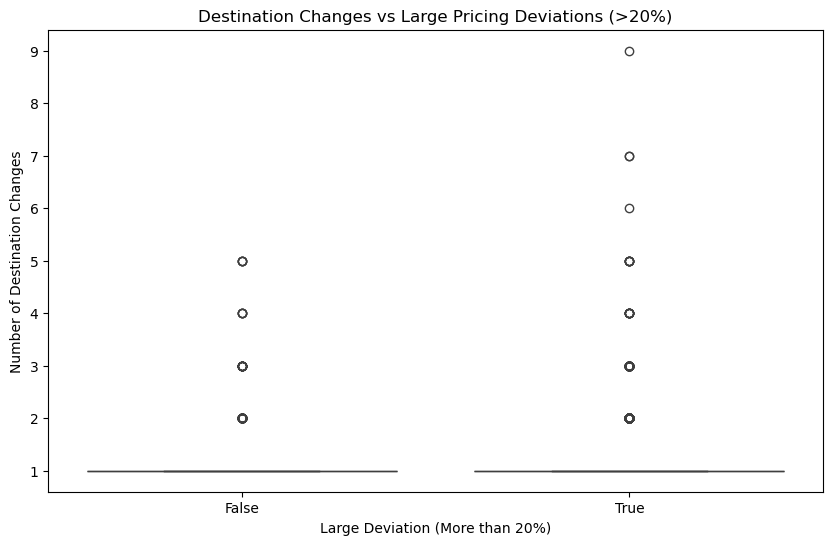

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=upfront_final, x='large_deviation', y='dest_change_number')
plt.title('Destination Changes vs Large Pricing Deviations (>20%)')
plt.xlabel('Large Deviation (More than 20%)')
plt.ylabel('Number of Destination Changes')
plt.show()

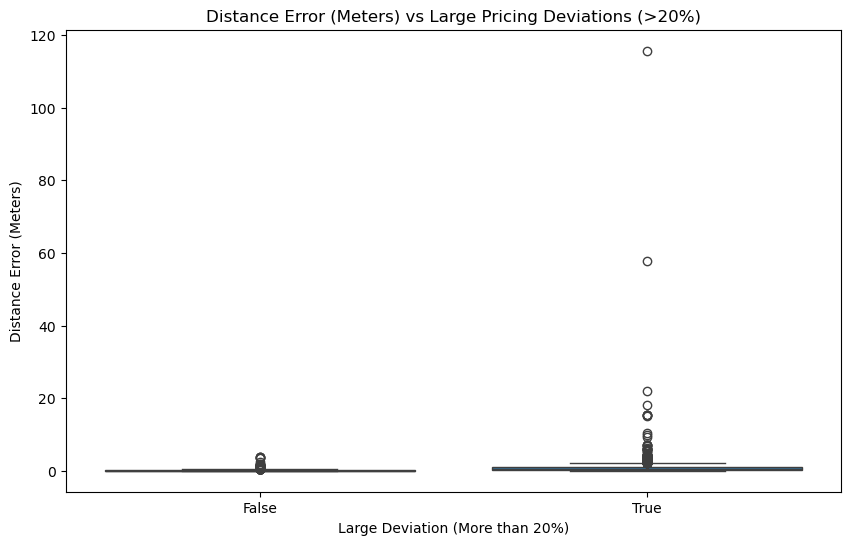

In [36]:
upfront_final['distance_error'] = abs(upfront_final['predicted_distance'] - upfront_final['distance']) / upfront_final['predicted_distance']


plt.figure(figsize=(10, 6))
sns.boxplot(data=upfront_final, x='large_deviation', y='distance_error')
plt.title('Distance Error (Meters) vs Large Pricing Deviations (>20%)')
plt.xlabel('Large Deviation (More than 20%)')
plt.ylabel('Distance Error (Meters)')
plt.show()

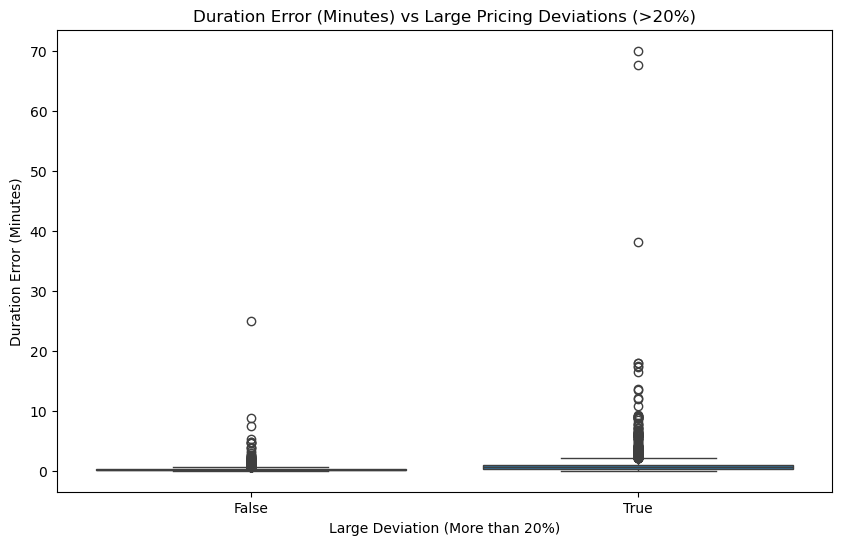

In [37]:
upfront_final['duration_error'] = abs(upfront_final['predicted_duration'] - upfront_final['duration']) / upfront_final['predicted_duration']

plt.figure(figsize=(10, 6))
sns.boxplot(data=upfront_final, x='large_deviation', y='duration_error')
plt.title('Duration Error (Minutes) vs Large Pricing Deviations (>20%)')
plt.xlabel('Large Deviation (More than 20%)')
plt.ylabel('Duration Error (Minutes)')
plt.show()

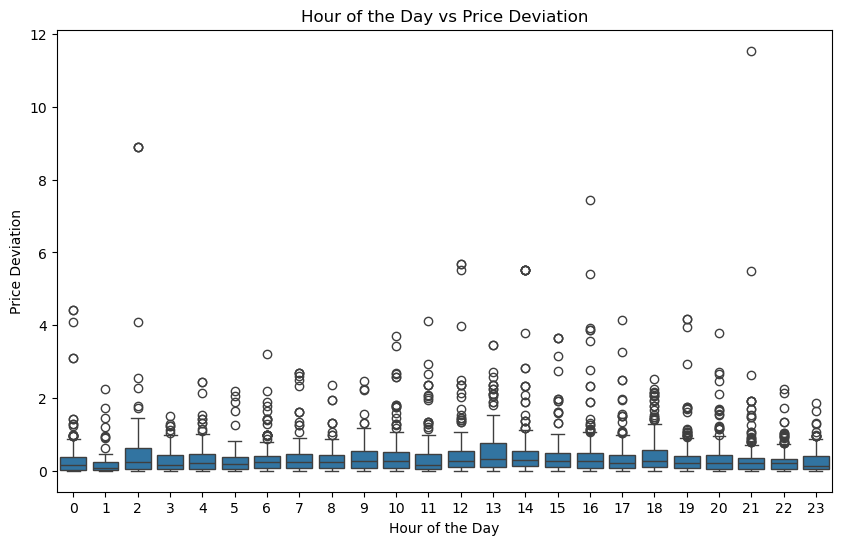

In [38]:
upfront_final['calc_created'] = pd.to_datetime(upfront_final['calc_created'])

# Extract hour of the day
upfront_final['hour_of_day'] = upfront_final['calc_created'].dt.hour

# Visualize price deviation by hour of the day
plt.figure(figsize=(10, 6))
sns.boxplot(data=upfront_final, x='hour_of_day', y='price_deviation')
plt.title('Hour of the Day vs Price Deviation')
plt.xlabel('Hour of the Day')
plt.ylabel('Price Deviation')
plt.show()

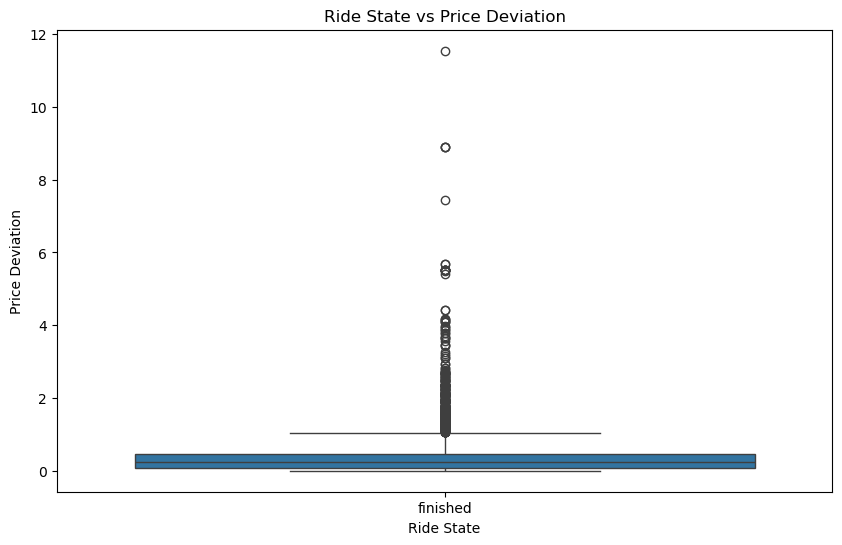

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=upfront_final, x='b_state', y='price_deviation')
plt.title('Ride State vs Price Deviation')
plt.xlabel('Ride State')
plt.ylabel('Price Deviation')
plt.show()

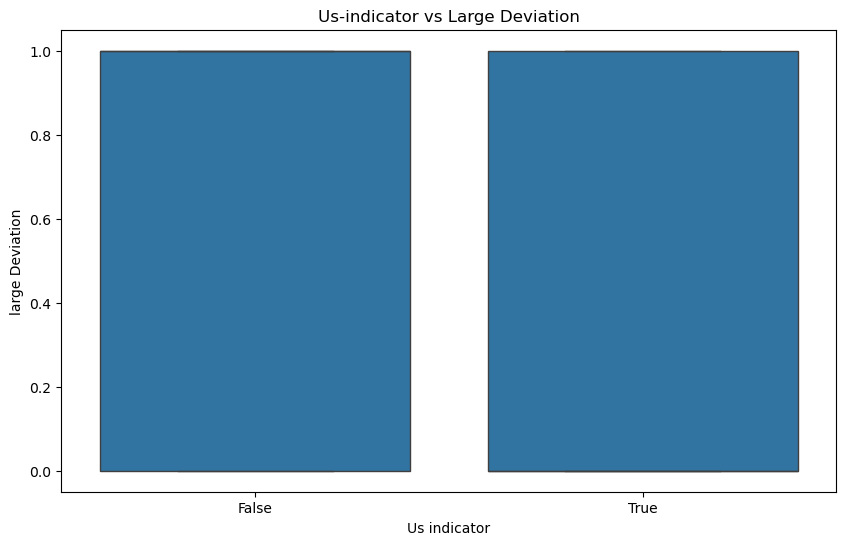

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=upfront_final, x='large_deviation', y='us_indicator')
plt.title('Us-indicator vs Large Deviation')
plt.xlabel('Us indicator')
plt.ylabel('large Deviation')
plt.show()

In [41]:
# Check the proportion of rides with deviations greater than 20%
deviation_summary = upfront_final['large_deviation'].value_counts(normalize=True) * 100
print(deviation_summary)

large_deviation
True     55.166667
False    44.833333
Name: proportion, dtype: float64


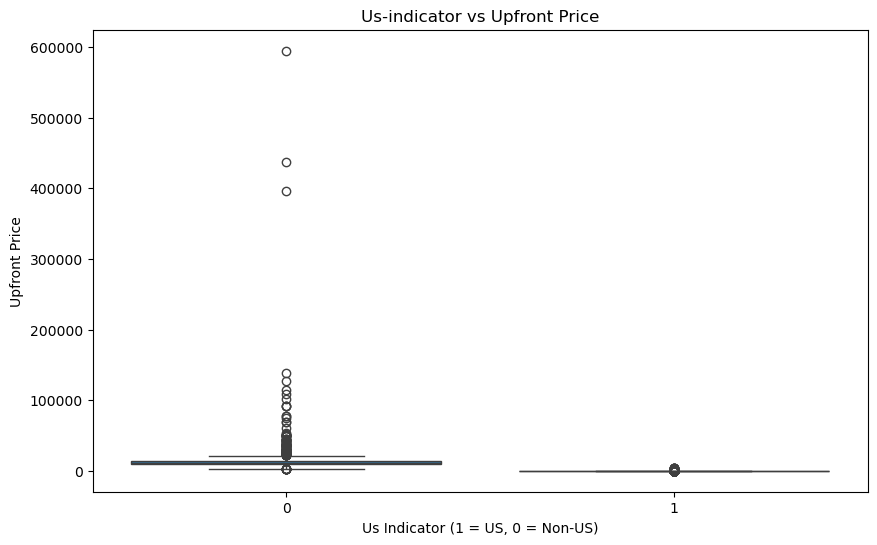

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=upfront_final, x='us_indicator', y='upfront_price')
plt.title('Us-indicator vs Upfront Price')
plt.xlabel('Us Indicator (1 = US, 0 = Non-US)')
plt.ylabel('Upfront Price')
plt.show()

In [81]:
upfront_final.to_csv('blinkit_final_Cleaned_final.csv', index=False)